In [1]:
import numpy as np
import cv2 as cv
from matplotlib import mlab 
from matplotlib import pyplot as plt
import random
import sys
import os
from scipy import stats
from datetime import datetime
            
import csv


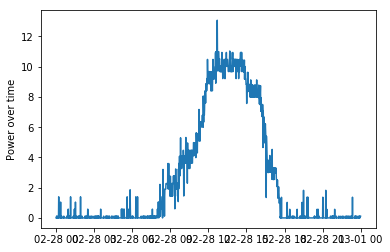

starting to get more power at:  2019-03-01 09:45:12


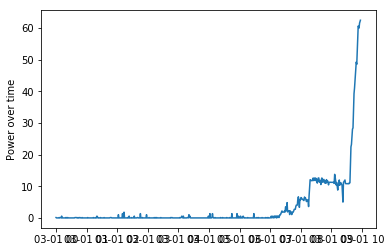

starting to get more power at:  2019-03-07 01:08:23
starting to decrease power at : 2019-03-07 05:40:51
starting to get more power at:  2019-03-07 05:43:52
starting to decrease power at : 2019-03-07 05:48:52
starting to get more power at:  2019-03-07 05:49:52
starting to decrease power at : 2019-03-07 05:50:53


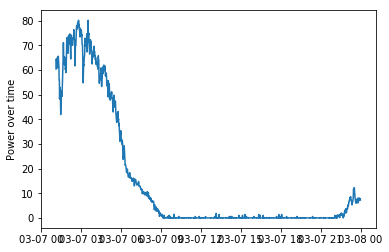

starting to get more power at:  2019-03-08 03:57:30
starting to decrease power at : 2019-03-08 03:58:31
starting to get more power at:  2019-03-08 04:00:31
starting to decrease power at : 2019-03-08 04:12:32


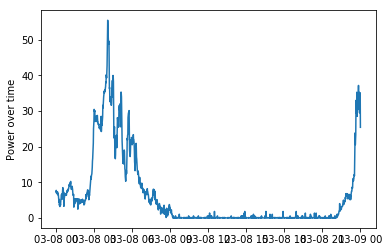

starting to get more power at:  2019-03-09 00:31:59
starting to decrease power at : 2019-03-09 00:32:59
starting to get more power at:  2019-03-09 00:36:59
starting to decrease power at : 2019-03-09 00:39:00
starting to get more power at:  2019-03-09 00:43:00
starting to decrease power at : 2019-03-09 00:46:00
starting to get more power at:  2019-03-09 00:48:00
starting to decrease power at : 2019-03-09 00:51:01
starting to get more power at:  2019-03-09 00:55:01
starting to decrease power at : 2019-03-09 00:58:01
starting to get more power at:  2019-03-09 01:00:02
starting to decrease power at : 2019-03-09 01:01:02
starting to get more power at:  2019-03-09 01:06:02
starting to decrease power at : 2019-03-09 01:09:03
starting to get more power at:  2019-03-09 01:10:03
starting to decrease power at : 2019-03-09 01:11:03
starting to get more power at:  2019-03-09 01:13:03
starting to decrease power at : 2019-03-09 01:16:03
starting to get more power at:  2019-03-09 01:19:04
starting to 

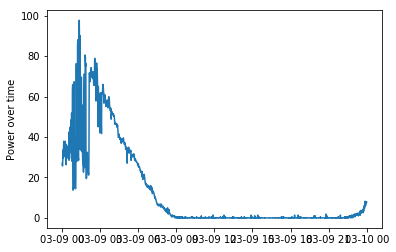

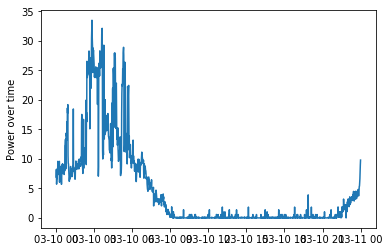

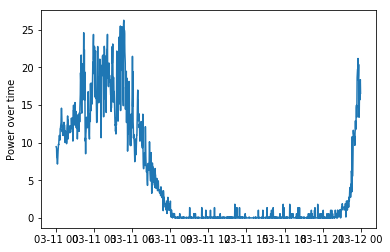

starting to get more power at:  2019-03-12 02:05:25
starting to decrease power at : 2019-03-12 02:06:25
starting to get more power at:  2019-03-12 02:08:26
starting to decrease power at : 2019-03-12 02:11:26
starting to get more power at:  2019-03-12 02:12:26
starting to decrease power at : 2019-03-12 02:13:26
starting to get more power at:  2019-03-12 02:14:26
starting to decrease power at : 2019-03-12 02:16:27
starting to get more power at:  2019-03-12 02:17:27
starting to decrease power at : 2019-03-12 02:18:27
starting to get more power at:  2019-03-12 02:19:27
starting to decrease power at : 2019-03-12 02:26:28
starting to get more power at:  2019-03-12 02:32:28
starting to decrease power at : 2019-03-12 02:50:30
starting to get more power at:  2019-03-12 02:52:30
starting to decrease power at : 2019-03-12 02:53:30
starting to get more power at:  2019-03-12 03:10:32
starting to decrease power at : 2019-03-12 03:13:32
starting to get more power at:  2019-03-12 03:14:32
starting to 

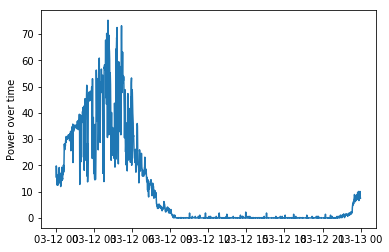

starting to get more power at:  2019-03-13 01:50:14
starting to decrease power at : 2019-03-13 01:51:14
starting to get more power at:  2019-03-13 03:01:21
starting to decrease power at : 2019-03-13 03:02:21
starting to get more power at:  2019-03-13 03:46:26
starting to decrease power at : 2019-03-13 03:47:26
starting to get more power at:  2019-03-13 03:55:27
starting to decrease power at : 2019-03-13 03:56:27
starting to get more power at:  2019-03-13 03:58:27
starting to decrease power at : 2019-03-13 04:00:27
starting to get more power at:  2019-03-13 04:01:27
starting to decrease power at : 2019-03-13 04:02:28
starting to get more power at:  2019-03-13 04:03:28
starting to decrease power at : 2019-03-13 04:25:30
starting to get more power at:  2019-03-13 04:26:30
starting to decrease power at : 2019-03-13 04:28:30
starting to get more power at:  2019-03-13 04:41:32
starting to decrease power at : 2019-03-13 04:42:32
starting to get more power at:  2019-03-13 04:43:32
starting to 

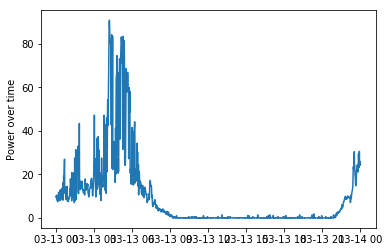

starting to get more power at:  2019-03-14 00:28:52
starting to decrease power at : 2019-03-14 00:29:52
starting to get more power at:  2019-03-14 00:30:53
starting to decrease power at : 2019-03-14 00:31:53
starting to get more power at:  2019-03-14 00:35:53
starting to decrease power at : 2019-03-14 00:38:53
starting to get more power at:  2019-03-14 00:39:54
starting to decrease power at : 2019-03-14 06:07:28


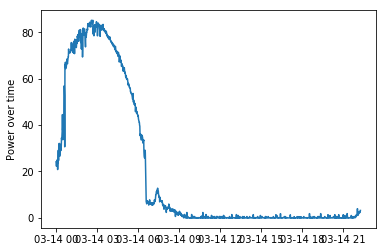

In [3]:

def pre_process():
    all_values = []
    
    with open('power.txt') as f:
        content = f.readlines()

    for x in content:
        x = x.strip().split(',')
        if len(x) == 5:
            date_str = x[0][0:24]
            #print(date_str)
            
            x[0] = datetime.strptime(date_str, "%a %b %d %Y %H:%M:%S")
            power = 0
            if float(x[1]) > 0 and float(x[4]) > 0:
                power = float(x[1]) * float(x[4])
            x.append(power)
            all_values.append(x)
    
    
   
    
    return all_values

all_values = pre_process()


def plot_by_day(day, all_values):
    day = datetime.strptime(day, "%b %d %Y")
        
    day_values = [x for x in all_values if x[0].date() == day.date()]
    time_values = [x[0] for x in day_values]
    power_values = [x[5] for x in day_values]
    started = False
    for x in day_values:
        
        if x[5] > 40 and not started:
            print("starting to get more power at: ",x[0])
            started=True
        elif x[5] < 40 and started:
            print("starting to decrease power at :",x[0])
            started = False
    plt.plot(time_values, power_values)
    label = "Power over time"
    plt.ylabel(label)
    plt.show()
    

for days in ["Feb 28 2019", "Mar 01 2019", "Mar 07 2019","Mar 08 2019", "Mar 09 2019", \
            "Mar 10 2019", "Mar 11 2019", "Mar 12 2019", "Mar 13 2019", "Mar 14 2019"]:
    
    plot_by_day(days, all_values)
    

# for days in [ "Mar 20 2019", "Mar 21 2019"]:
    
#     plot_by_day(days, all_values)




